In [2]:
using GLMakie
GLMakie.activate!()
using LinearAlgebra

In [1]:
x = -10:0.1:10
y = -10:0.1:10

z = [xx^2+yy^2 for xx in x, yy in y]

fig = Figure()
ax = Axis3(fig[1,1])

surface!(x,y,z)
fig

UndefVarError: UndefVarError: `Figure` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
# x = -5:0.25:5
# y = -5:0.25:5

x = -5:1:5
y = -5:1:5

# z = [sin(xx) + cos(yy) for xx in x, yy in y]
z = [xx^2 - yy^2 for xx in x, yy in y]

fig = Figure()
ax = Axis3(fig[1,1])

# wireframe!(x,y,z)
surface!(x,y,z)

# ps = [Point3f(xx, yy, xx^2 + yy^2) for xx in x for yy in y]
# ns = [Vec3f(-xx, -yy, -xx^2 - yy^2) for xx in x for yy in y]

# ps = [Point3f(xx, yy, sin(xx) + cos(yy)) for xx in x for yy in y]
# ns = [Vec3f(-cos(xx), sin(yy), -cos(xx)^2 - sin(yy)^2) for xx in x for yy in y]

ps = [Point3f(xx, yy, xx^2 - yy^2) for xx in x for yy in y]
ns = [Vec3f(-2*xx, 2*yy, -4*xx^2 - 4*yy^2) for xx in x for yy in y]

# ns = map(n -> 1.5 * n / (norm(n) + 1e-6), ns)
lengths = norm.(ns)
arrows3d!(
    ps, ns, color = lengths, lengthscale = 1.5,
    align = :center
)

fig

UndefVarError: UndefVarError: `Figure` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
for x in xs
for xx in x

In [ ]:
ps = [Point3f(x, y, z) for x in -5:2:5 for y in -5:2:5 for z in -5:2:5]
ns = map(p -> 0.1 * Vec3f(p[1], p[2], p[3]), ps)

arrows3d(
    ps, ns,
    shaftcolor = :green, tipcolor = :blue,
    align = :center, axis=(type=Axis3,)
)


In [ ]:
function gradient_descent(v0, ∇f, α, δ, k_max)
    v_prev = v0
    for k in 1:k_max
        v = v_prev - α*∇f(v_prev)
        if norm(v - v_prev) < δ
            return v, k
        end
        v_prev = v
    end
    println("Warning: iteration limit $(k_max) exceeded")
    return v, k
end

gradient_descent (generic function with 1 method)

In [ ]:
function ∇f(v)
    return [2v[1], 2v[2]]
end

∇f (generic function with 1 method)

In [ ]:
α = 0.001
δ = 0.000001
k_max = 100_000

v0s = []
ks  = []

n = 1000
for i in 1:n
    v0 = [rand(), rand()]
    v_f, k = gradient_descent(v0, ∇f, α, δ, k_max)
    push!(v0s, v0)
    push!(ks, k)
end

# println("v0: $(round.(v0, digits=3))")
# println("v: $(round.(v_f, digits=3))")
# println("iterations: $k")


In [ ]:
fig = Figure()
ax = Axis(fig[1,1])
scatter!(norm.(v0s), ks)

min_k = minimum(ks)
xs = 0:0.01:maximum(norm.(v0s))
# ys = 1500 .* log.(xs) .+ min_k

# sl_x = Slider(fig[2, 1], range = 0:100:10000, startvalue = 3)
# sl_y = Slider(fig[1, 2], range = 0:500:10000, horizontal = false, startvalue = 6)

# # horizontal slider with label beside it
# Label(sl_x.layout[1, 2], lift(v -> "x = $v", sl_x.value))

# # vertical slider with label below it
# Label(sl_y.layout[2, 1], lift(v -> "y = $v", sl_y.value))

# ys = 150 .* log.(xs*100)


sg = SliderGrid(
    fig[1, 2],
    (label = "a", range = 400:10:1000, format = "{:.1f}", startvalue = 5.3),
    (label = "b", range = 0:500:10000, format = "{:.1fwha}", startvalue = 10.2),
    width = 350,
    tellheight = false)

sl_a = sg.sliders[1]
sl_b = sg.sliders[2]
ys = lift(sl_a.value, sl_b.value) do a, b
    a .* log.(b*xs)
end

lines!(xs,ys)
fig

LoadError: Invalid formatting spec: .1fwha

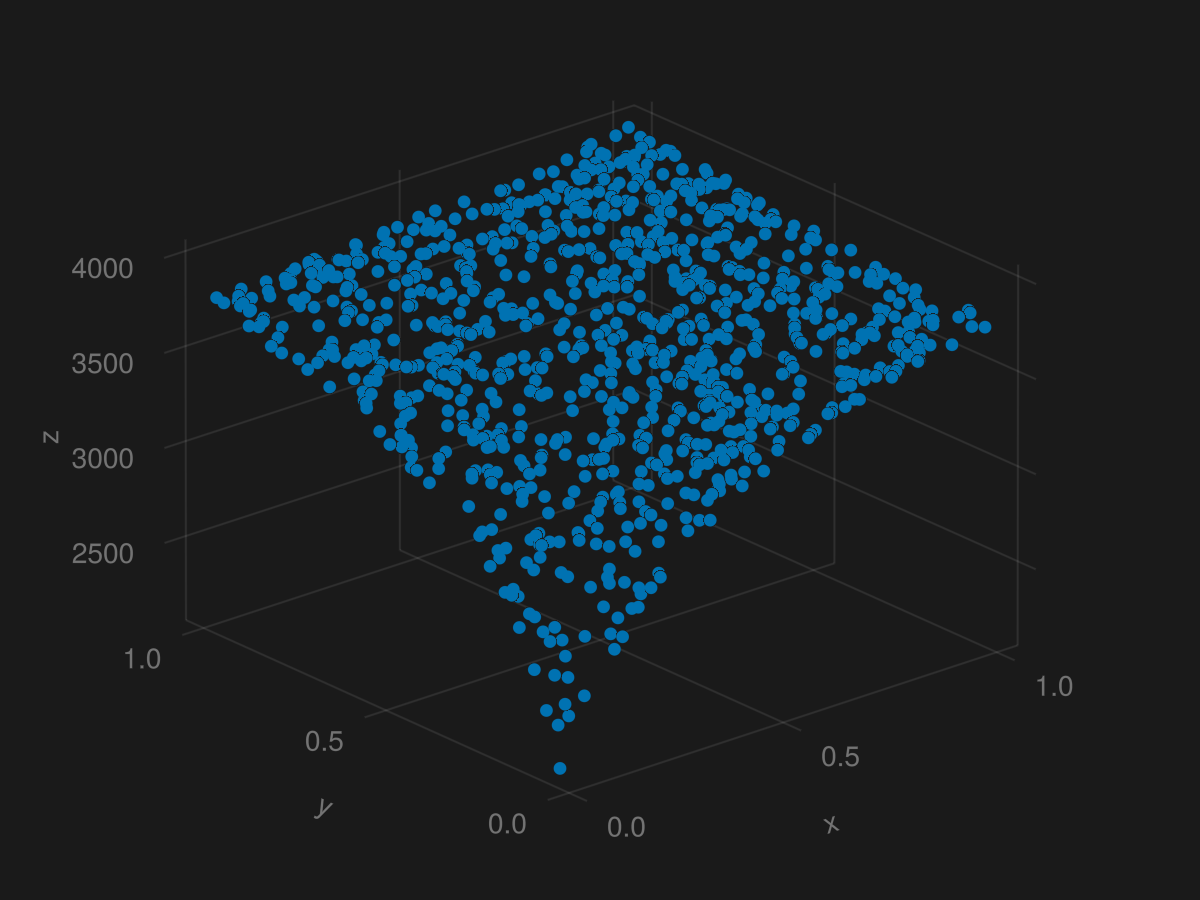

In [ ]:
xs,ys = first.(v0s), last.(v0s)

fig2 = Figure()
ax = Axis3(fig2[1,1])
scatter!(xs, ys, ks)
fig2


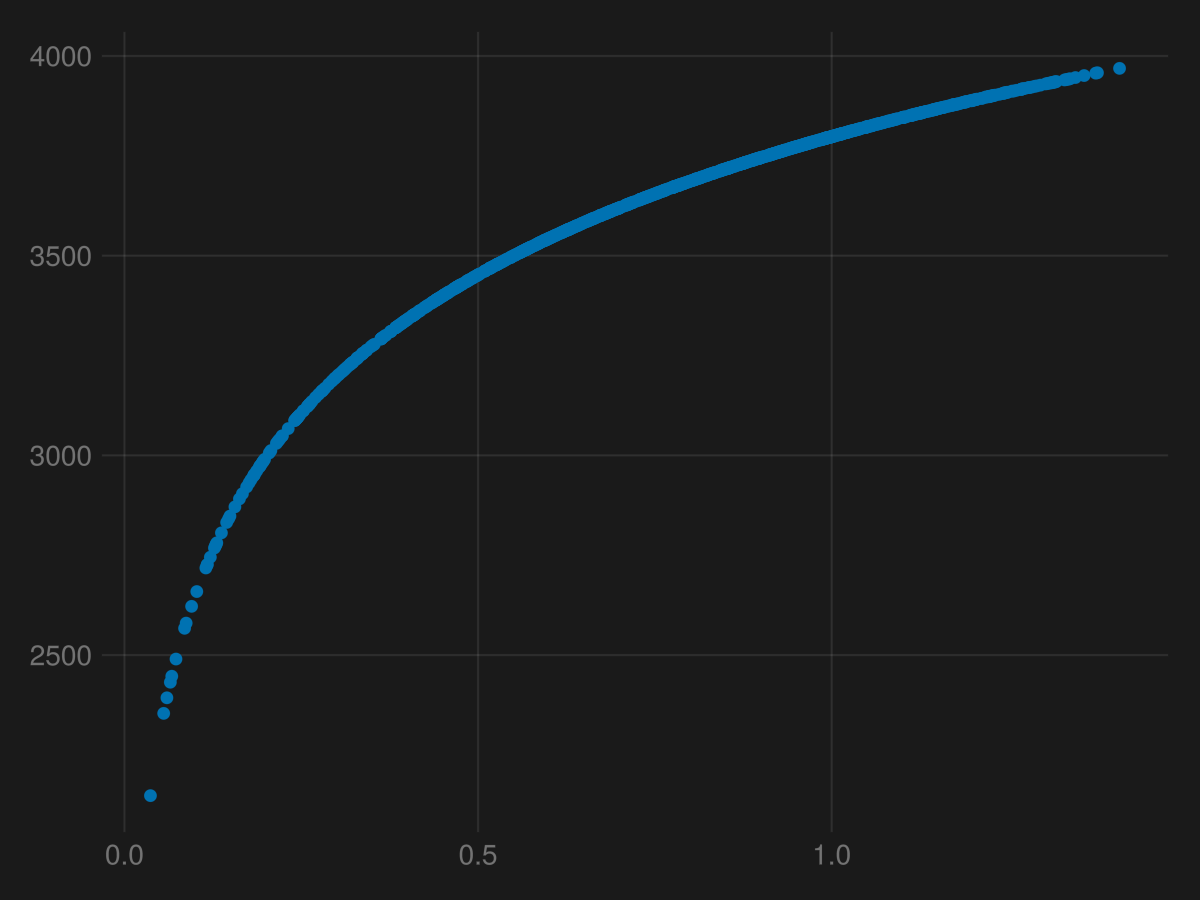

In [ ]:
fig3 = Figure()
ax = Axis(fig3[1,1])

# scatter!(log.(norm.(v0s)), ks)
scatter!(norm.(v0s), ks)
fig3

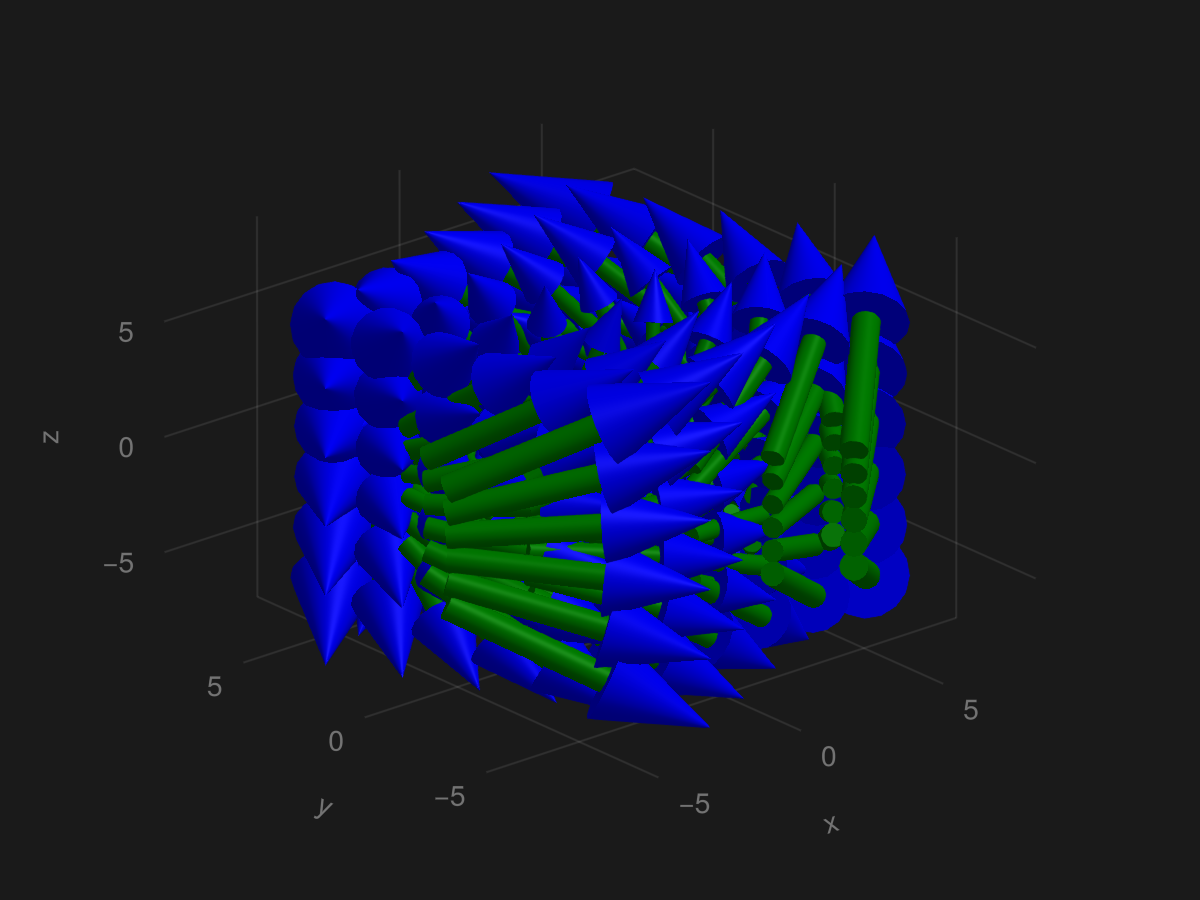

In [ ]:
ps = [Point3f(x, y, z) for x in -5:2:5 for y in -5:2:5 for z in -5:2:5]
# ns = map(p -> 0.1 * Vec3f(p[1], p[2], p[3]), ps)
# ns = map(p -> Vec3f(rand(3)), ps)
# ns = map(p -> Vec3f(p), ps)
ns = map(p -> Vec3f(-p[2],p[1], p[3]), ps)
# ns = map(p -> normalize(Vec3f(2p[1], 2p[2], -2p[3])), ps)
# ns = map(p -> 0.1 * Vec3f(p[2], p[3], p[1]), ps)
# ns = map(p -> Vec3f(sin(p[2]), cos(p[1]), sin(p[1]+p[2])), ps)
# ns = map(p -> Vec3f(2p[1], -2p[2], 2p[3]), ps)
m = Vec3f(0,0,1)
# ns = map(p -> begin
#     r = Vec3f(p)
#     r2 = dot(r,r)
#     rnorm = sqrt(r2)
#     if rnorm < 1e-3
#         Vec3f(0,0,0)
#     else
#         (3 * dot(m,r) * r / rnorm^5) - (m / rnorm^3)
#     end
# end, ps)

# σ, ρ, β = 10.0, 28.0, 8/3
# ns = map(p -> 0.01*Vec3f(
#     σ * (p[2] - p[1]),
#     p[1]*(ρ - p[3]) - p[2],
#     p[1]*p[2] - β*p[3]
# ), ps)

arrows3d(
    ps, ns,
    shaftcolor = :green, tipcolor = :blue,
    align = :center, axis=(type=Axis3,)
)


In [ ]:
using GLMakie

# scalar field
f(x,y,z) = x^2 + y^2 + z^2

fig5 = Figure(resolution = (800,600))
ax = Axis3(fig5[1,1], xlabel="x", ylabel="y", zlabel="z")

# grid for scalar field
xs = -2:0.2:2
ys = -2:0.2:2
zs = -2:0.2:2

X, Y, Z = [x for x in xs, y in ys, z in zs],
          [y for x in xs, y in ys, z in zs],
          [z for x in xs, y in ys, z in zs]

vals = [f(x,y,z) for x in xs, y in ys, z in zs]

# isosurface (constant f value, like a sphere)
volume!(ax, xs, ys, zs, vals; algorithm = :iso, isovalue = 3.0,
        colormap = :viridis, transparency=true, alpha=0.4)

# gradient vectors = derivative of f
ps = [Point3f(x,y,z) for x in -2:1:2, y in -2:1:2, z in -2:1:2]
ns = map(p -> Vec3f(2p[1], 2p[2], 2p[3]), ps)  # ∇f = (2x,2y,2z)

# normalize arrows for display
ns = map(n -> n / (norm(n)+1e-6), ns)

arrows!(ax, ps, ns; arrowsize=0.08, linewidth=1.5, color=:orange)

fig5

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/gordon/.julia/packages/Makie/4JW9B/src/scenes.jl:264


ErrorException: Encountered `StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}` with value -2.0:0.2:2.0 on side x in `convert_arguments` for the `VolumeLike`
        conversion. Using `StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}` to specify one dimension of `VolumeLike` is deprecated because `VolumeLike`
        sides always need exactly two values, start and stop. Use interval notation `start .. stop`,
        a two-element tuple `(start, stop)` or `Makie.EndPoints(start, stop)` instead.